In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

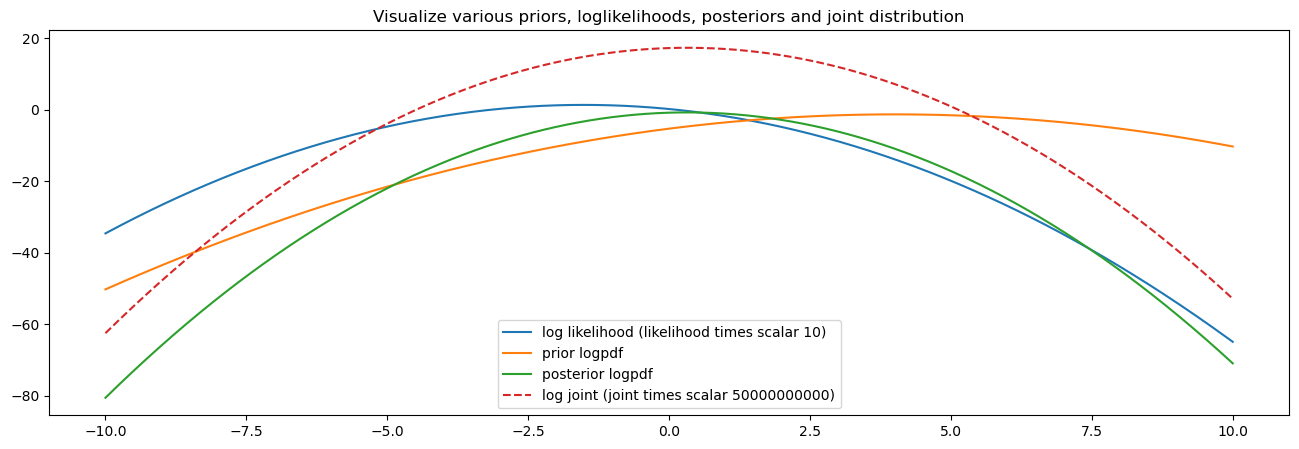

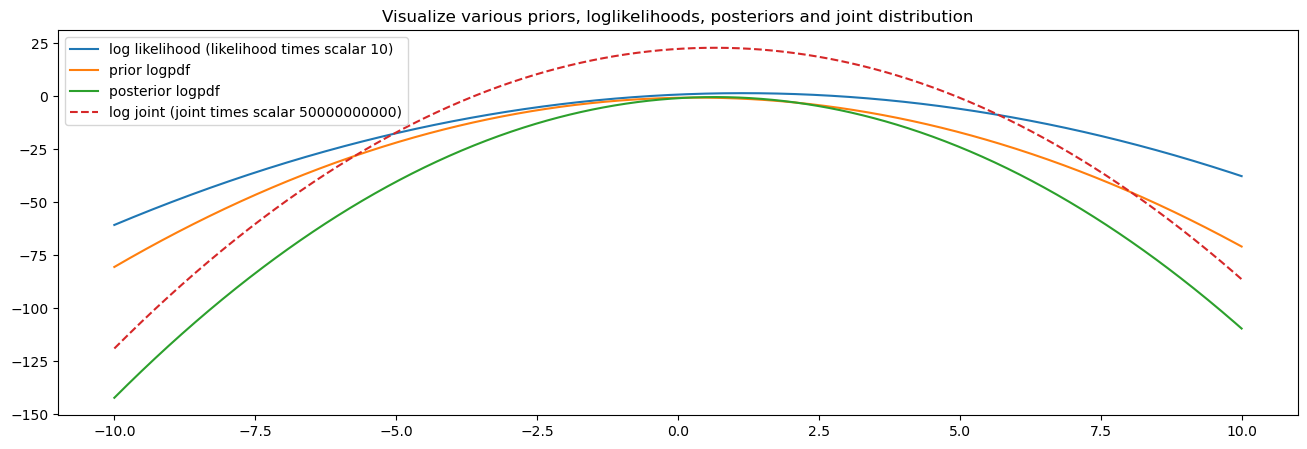

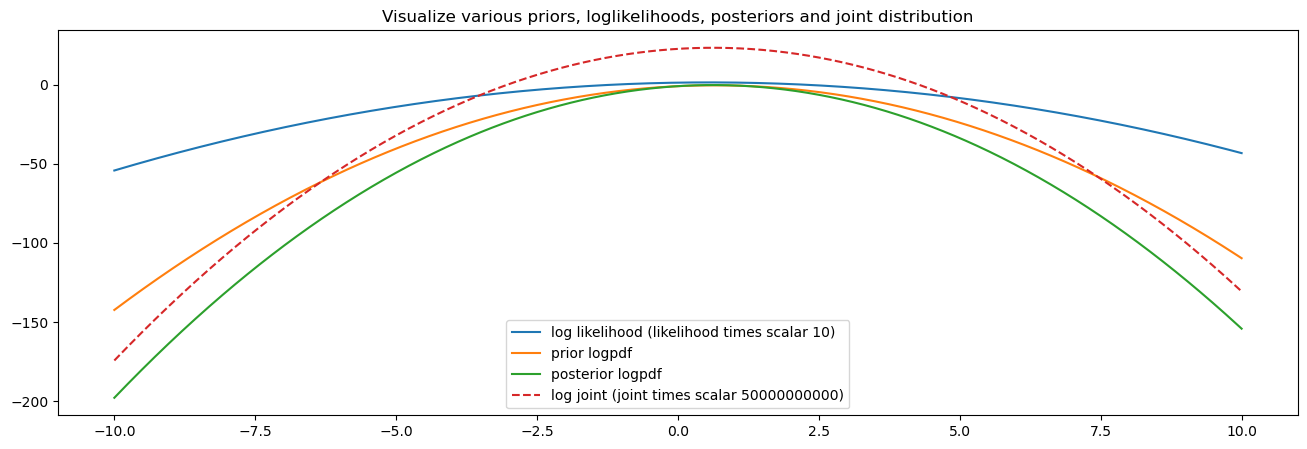

In [2]:
#Part 2-1
n = 3
# simulate
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10,10,1001)


for xi in x:
    log_likelihood = stats.norm.logpdf(xi*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1) # sigma=1 know
    prior_log = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?
    c,c2 = 50000000000,10;
    joint = math.log(c) + log_likelihood + prior_log # elementwise multiplication
    
    posterior = stats.norm(loc=(tau*theta_0+xi)/(tau+1), scale = 1/(tau+1)**0.5).logpdf(parameter_domain)
    
    # Part 2-2
    plt.figure(figsize=(16,5));
    plt.plot(parameter_domain, math.log(c2)+log_likelihood, label="log likelihood (likelihood times scalar "+str(c2)+")");
    plt.plot(parameter_domain, prior_log, label="prior logpdf");
    plt.plot(parameter_domain, posterior, label="posterior logpdf");
    plt.plot(parameter_domain, joint, linestyle="--", label="log joint (joint times scalar "+str(c)+")");
    plt.legend();
    plt.title("Visualize various priors, loglikelihoods, posteriors and joint distribution");
    
    theta_0 = (tau*theta_0+xi)/(tau+1)
    tau += 1

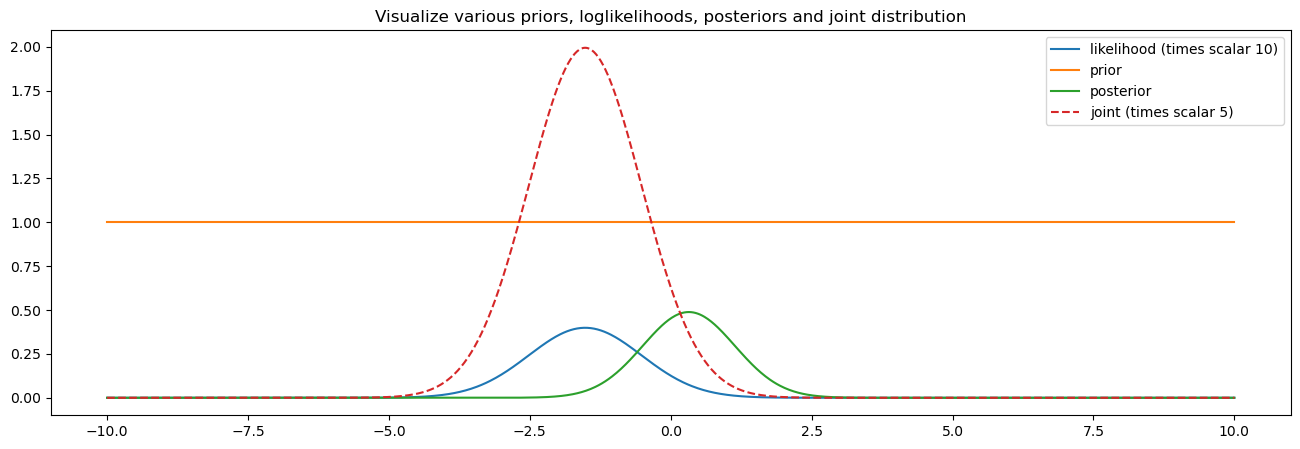

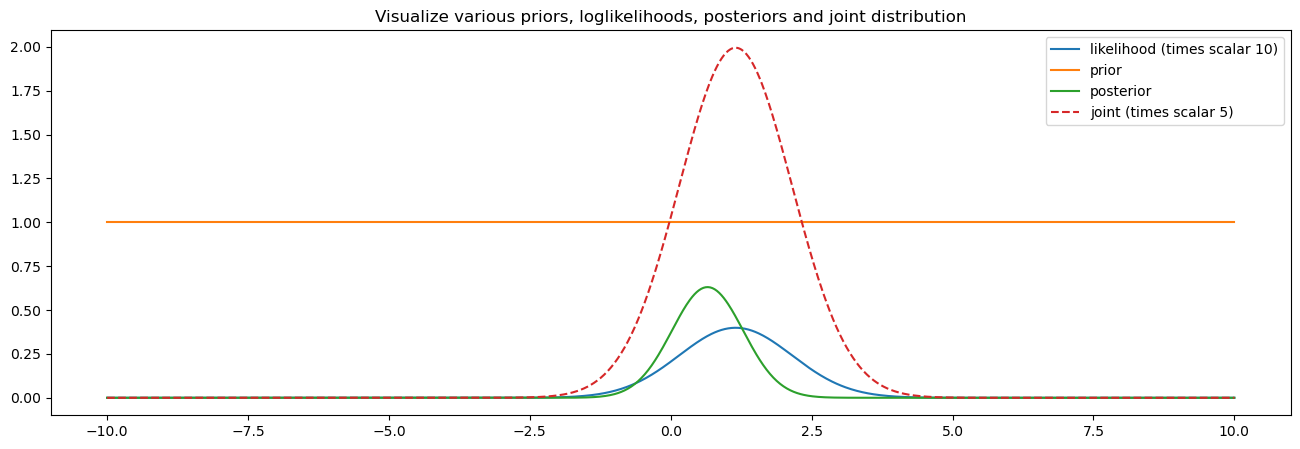

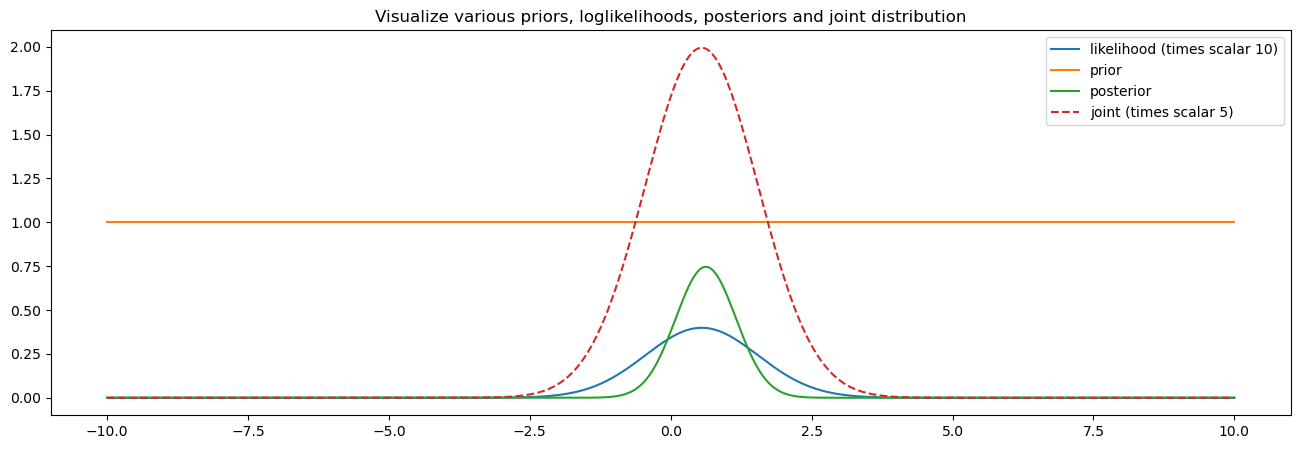

In [11]:
# Part2-3

theta_0, tau = 4, 1/2

for xi in x:
    prior = lambda x: np.ones(x)
    likelihood = stats.norm.pdf(xi*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1) # sigma=1 know
    prior = prior(1001) # What if p(theta) = 1?
    c,c2 = 5,10;
    joint = c*likelihood*prior # elementwise multiplication

    posterior = stats.norm(loc=(tau*theta_0+xi)/(tau+1), scale = 1/(tau+1)**0.5).pdf(parameter_domain)

    plt.figure(figsize=(16,5));
    plt.plot(parameter_domain, likelihood, label="likelihood (times scalar "+str(c2)+")");
    plt.plot(parameter_domain, prior, label="prior");
    plt.plot(parameter_domain, posterior, label="posterior");
    plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")");
    plt.legend();
    plt.title("Visualize various priors, loglikelihoods, posteriors and joint distribution");

    theta_0 = (tau*theta_0+xi)/(tau+1)
    tau += 1
    
# posterior = likelihood x constant(prior) / marginal likelyhood constant (normalizing constant)

#### posterior distribution of a normal likelihood is proportional to the joint distribution.


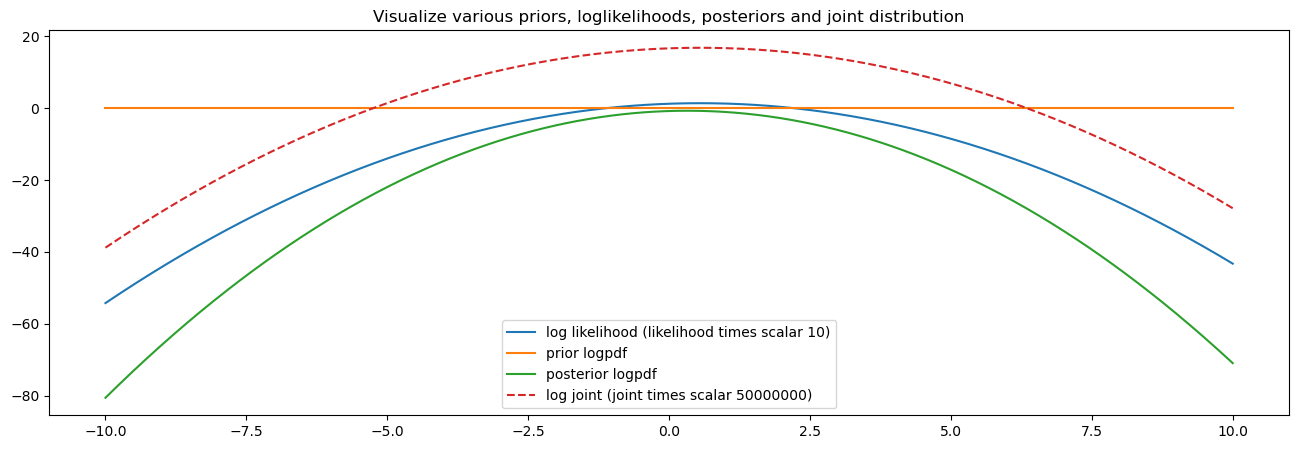

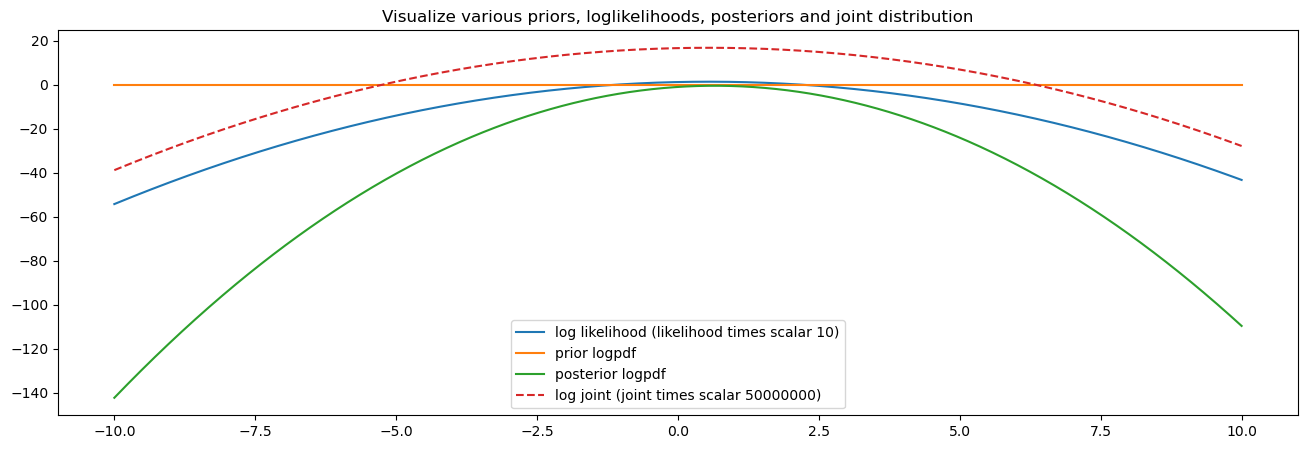

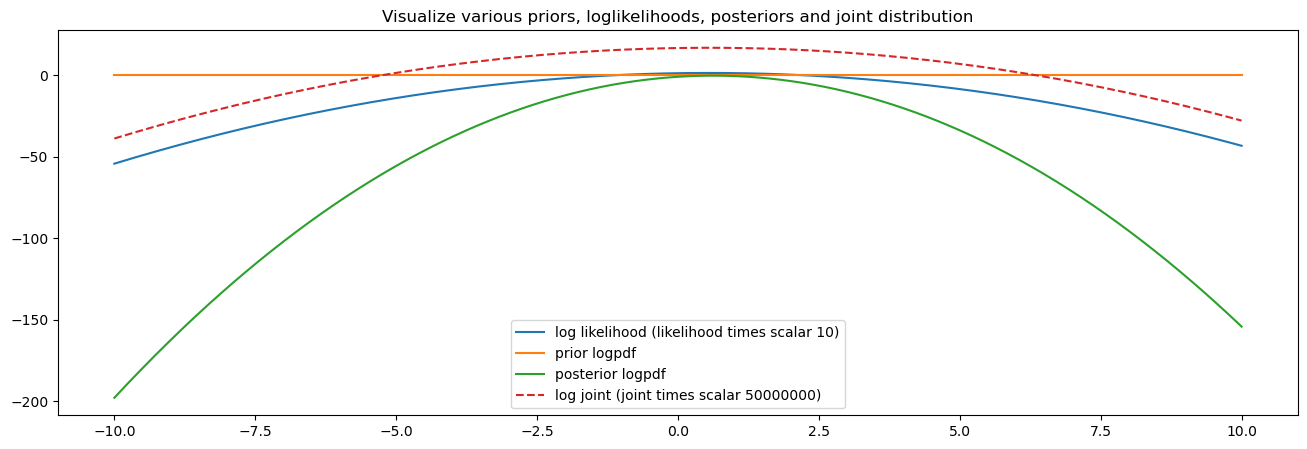

In [14]:
# part 2-4
theta_0, tau = 4, 1/2

for xi in x:
    loglikelihood = stats.norm.logpdf(xi*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1)
    prior_log = np.zeros(1001)
    joint = math.log(c)+log_likelihood + prior_log
    c,c2 = 50000000,10;
    posterior = stats.norm(loc=(tau*theta_0+xi)/(tau+1), scale = 1/(tau+1)**0.5).logpdf(parameter_domain)
    
    plt.figure(figsize=(16,5));
    plt.plot(parameter_domain, math.log(c2)+log_likelihood, label="log likelihood (likelihood times scalar "+str(c2)+")");
    plt.plot(parameter_domain, prior_log, label="prior logpdf");
    plt.plot(parameter_domain, posterior, label="posterior logpdf");
    plt.plot(parameter_domain, joint, linestyle="--", label="log joint (joint times scalar "+str(c)+")");
    plt.legend();
    plt.title("Visualize various priors, loglikelihoods, posteriors and joint distribution");
    
    theta_0 = (tau*theta_0+xi)/(tau+1)
    tau += 1
    
    
##### The difference between loglikelihood and and log of posteriors is the sum of the log of (improper) prior and the log of marginal constant